In [2]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA


from sklearn.ensemble import ExtraTreesClassifier

**data import**

In [3]:
data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header = None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [4]:
names =["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
data.columns=names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [5]:
data['Class'].replace(
                      {
                       1:"building_windows_float",
                       2:"building_windows_non_float",
                       3:"vehicle_windows_float",
                       4:"vehicle_windows_non_float",
                       5:"containers",
                       6:"tableware",
                       7:"headlamps",
                      },inplace=True)
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float


In [6]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col]=np.nan
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,building_windows_float
1,1.51761,13.89,NaN,1.36,72.73,0.48,7.83,0.0,0.00,building_windows_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,NaN,0.0,0.00,building_windows_float
3,1.51766,NaN,3.69,1.29,72.61,NaN,8.22,0.0,0.00,building_windows_float
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,0.00,building_windows_float
5,NaN,12.79,NaN,1.62,72.97,0.64,8.07,0.0,0.26,building_windows_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,building_windows_float
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,building_windows_float
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,building_windows_float
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,building_windows_float


**Data vizualization**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      203 non-null    float64
 1   Na      195 non-null    float64
 2   Mg      201 non-null    float64
 3   Al      203 non-null    float64
 4   Si      201 non-null    float64
 5   K       199 non-null    float64
 6   Ca      203 non-null    float64
 7   Ba      199 non-null    float64
 8   Fe      201 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,203.000000,195.000000,201.000000,203.000000,201.000000,199.000000,203.000000,199.000000,201.000000
mean,1.518398,13.407436,2.672139,1.424236,72.642786,0.498442,8.992808,0.169146,0.057960
std,0.003094,0.812729,1.451798,0.467531,0.792950,0.674095,1.432793,0.467623,0.098053
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516515,12.885000,1.880000,1.190000,72.250000,0.120000,8.270000,0.000000,0.000000
50%,1.517690,13.310000,3.480000,1.360000,72.780000,0.550000,8.610000,0.000000,0.000000
75%,1.519170,13.850000,3.610000,1.625000,73.100000,0.610000,9.205000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.040000,75.410000,6.210000,16.190000,2.880000,0.510000


In [9]:
display(data['Class'].describe())
print("===================================")
display(data['Class'].value_counts())

count                            197
unique                             6
top       building_windows_non_float
freq                              70
Name: Class, dtype: object

building_windows_non_float    70
building_windows_float        68
headlamps                     26
vehicle_windows_float         16
containers                    11
tableware                      6
Name: Class, dtype: int64

In [10]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage=100*data[col].isna().sum()/len(data[col])
  print("column",col,"contains",missing_values_counts,
        "NULL values(", percentage ,"%).")

column RI contains 11 NULL values( 5.140186915887851 %).
column Na contains 19 NULL values( 8.878504672897197 %).
column Mg contains 13 NULL values( 6.074766355140187 %).
column Al contains 11 NULL values( 5.140186915887851 %).
column Si contains 13 NULL values( 6.074766355140187 %).
column K contains 15 NULL values( 7.009345794392523 %).
column Ca contains 11 NULL values( 5.140186915887851 %).
column Ba contains 15 NULL values( 7.009345794392523 %).
column Fe contains 13 NULL values( 6.074766355140187 %).
column Class contains 17 NULL values( 7.94392523364486 %).


**Histogram**

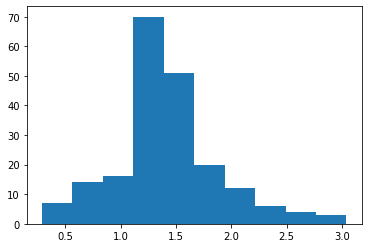

In [11]:
col='Al'
plt.hist(data[col])
plt.show()

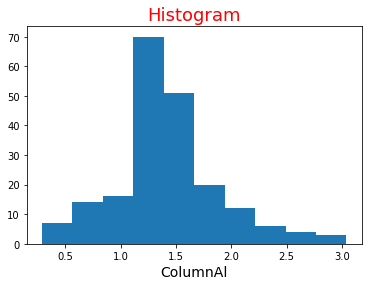

In [12]:
fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col])
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)
plt.show()

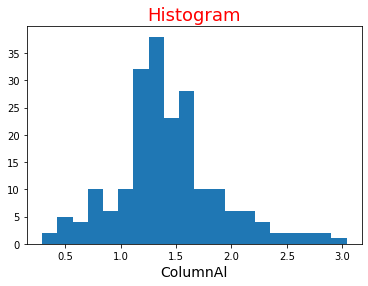

In [13]:
fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col], bins=20)
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)
plt.show()

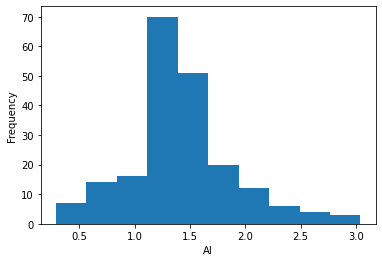

In [14]:
ax= data[col].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

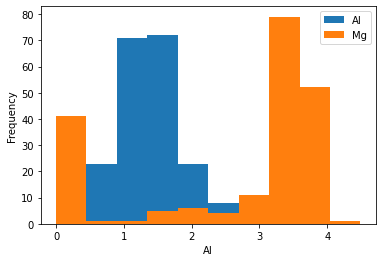

In [15]:
ax= data[['Al','Mg']].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

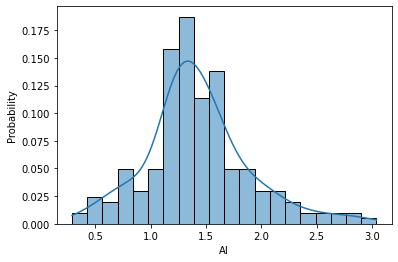

In [16]:
sns.histplot(data=data, x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show()

<function matplotlib.pyplot.show>

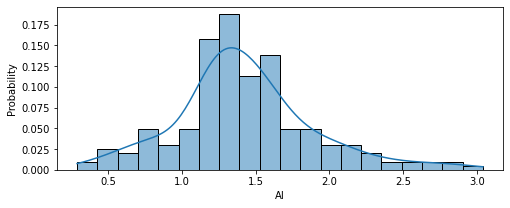

In [17]:

plt.figure(figsize=(8,3))
ax=sns.histplot(data=data, x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show

**bar plot**

In [18]:
col='Class'

In [19]:
df1= data[col].value_counts()
df1

building_windows_non_float    70
building_windows_float        68
headlamps                     26
vehicle_windows_float         16
containers                    11
tableware                      6
Name: Class, dtype: int64

In [20]:
df1.index.values

array(['building_windows_non_float', 'building_windows_float',
       'headlamps', 'vehicle_windows_float', 'containers', 'tableware'],
      dtype=object)

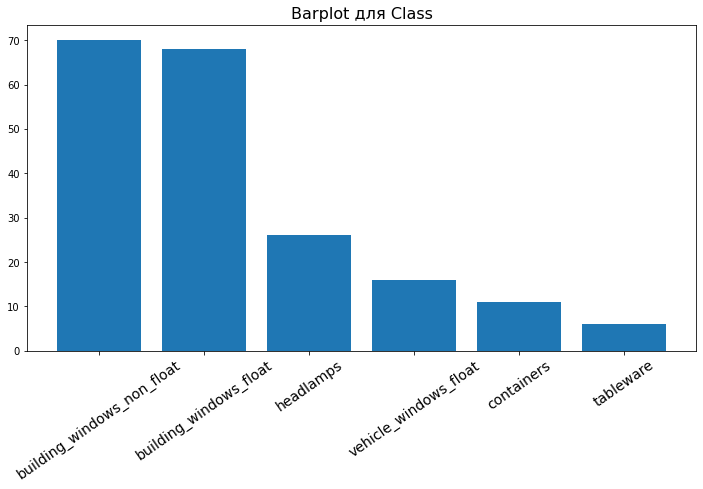

In [21]:
col='Class'

fig,ax =plt.subplots(figsize=(12,6))

ax.bar(data[col].value_counts().index.values,
       data[col].value_counts().values)
ax.set_xlabel(None,fontsize=16)
ax.set_title('Barplot для '+str(col),fontsize=16)
ax.tick_params(axis='x',which='major',
               labelsize=14,rotation=35)
plt.show()

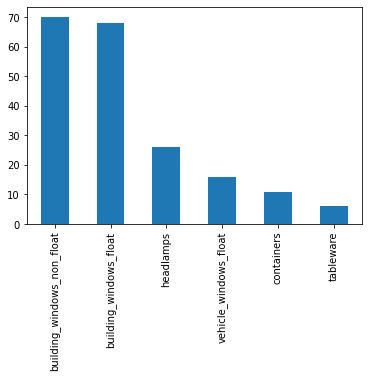

In [22]:
data[col].value_counts().plot(kind='bar')
plt.show()

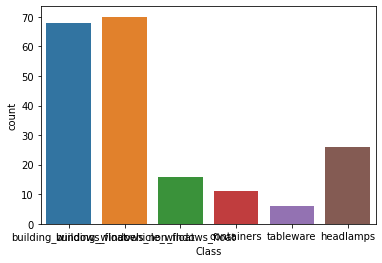

In [23]:
sns.countplot(data=data, x='Class')
plt.show()


**Задание 3. Визуальный анализ данных**

In [25]:
cols = data.columns
cols

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [27]:
import ipywidgets as widgets
def showDiagramm(col):
    fig, ax = plt.subplots(figsize=(10,10))
    if col == "Class":
      ax.bar(data[col].value_counts().index.values, data[col].value_counts().values)
      ax.set_title("Barplot для " + col, fontsize=16)
      ax.tick_params(axis="x", which="major", labelsize=10, rotation = 35)
    else:
      ax.hist(data[col], density = True, bins = 20)
      ax.set_xlabel(col, fontsize=16)
      ax.set_title("Гистограмма для " + col, fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col=cols);

interactive(children=(Dropdown(description='col', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'…

In [28]:
def showDiagramm(col):
    fig, ax = plt.subplots(figsize=(10,10))
    data1 = data[col][~np.isnan(data[col])].copy()
    ax.boxplot(data1, showmeans=True) 
    ax.set_title(f"Ящик с усами, {col}", fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col=cols[:-1]);

interactive(children=(Dropdown(description='col', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'…

In [29]:
def showDiagramm(col1, col2):
    fig, ax = plt.subplots(figsize=(10,10))
    for glassType in data['Class'].value_counts().index.values:
      ax.scatter(data[col1][data['Class']==glassType], data[col2][data['Class']==glassType], label=glassType)
    ax.set_xlabel(col1, fontsize=16)
    ax.set_ylabel(col2, fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col1=cols[:-1], col2=cols[:-1]);

interactive(children=(Dropdown(description='col1', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe…

**other plots**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

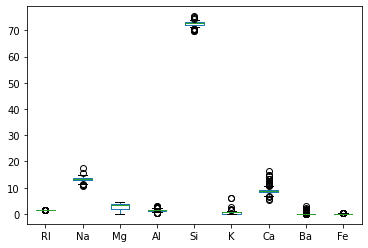

In [30]:
data.plot(kind='box')
plt.show

In [31]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [32]:
data.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

In [33]:
data.columns.values !='Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [34]:
data.columns.values[data.columns.values !='Ca']

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe', 'Class'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

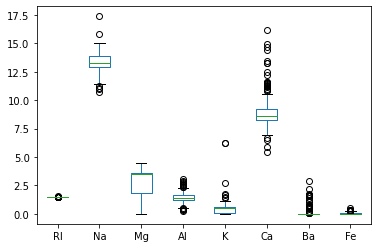

In [35]:
data[data.columns.values[data.columns.values !='Si']].plot(kind='box')
plt.show

<function matplotlib.pyplot.show>

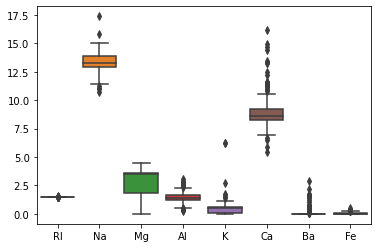

In [36]:
sns.boxplot(data=data[data.columns.values[data.columns.values !='Si']])
plt.show

**scaler**

In [37]:
scaler1=prepro.MinMaxScaler()
datascaler1=scaler1.fit_transform(data[data.columns.values[data.columns.values !='Class']])

datascaler1=pd.DataFrame(datascaler1, columns=data.columns.values[data.columns.values !='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


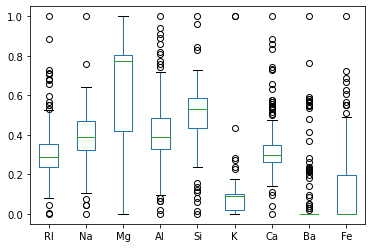

In [38]:
datascaler1.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show>

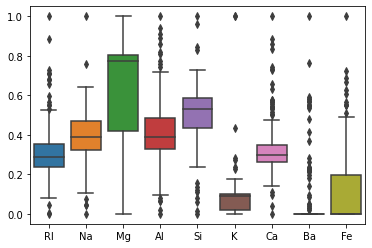

In [39]:
sns.boxplot(data=datascaler1)
plt.show

In [40]:
scaler2=prepro.StandardScaler()
datascaler2=scaler2.fit_transform(data[data.columns.values[data.columns.values !='Class']])

datascaler2=pd.DataFrame(datascaler2, columns=data.columns.values[data.columns.values !='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


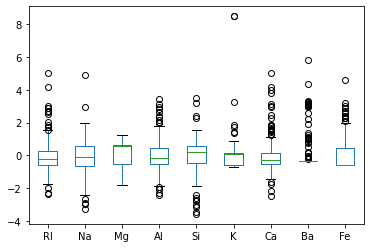

In [41]:
datascaler2.plot(kind='box')
plt.show()

**pair plot**

In [42]:
col1='Mg'
col2='Fe'

<function matplotlib.pyplot.show>

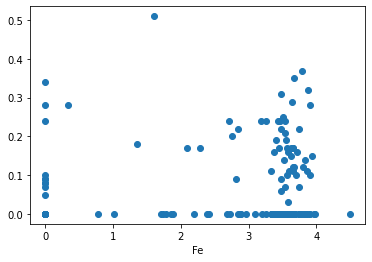

In [43]:
fig, ax =plt.subplots()
ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_xlabel(col2)

plt.show

In [44]:
df1=data['Class'].value_counts()
df1.index.values

array(['building_windows_non_float', 'building_windows_float',
       'headlamps', 'vehicle_windows_float', 'containers', 'tableware'],
      dtype=object)

<function matplotlib.pyplot.show>

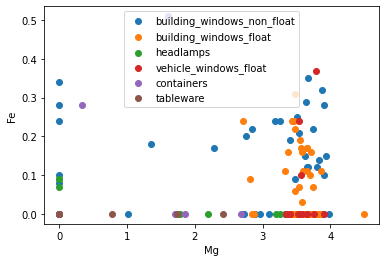

In [45]:
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][data['Class']==glassType],data[col2] [data['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show

<function matplotlib.pyplot.show>

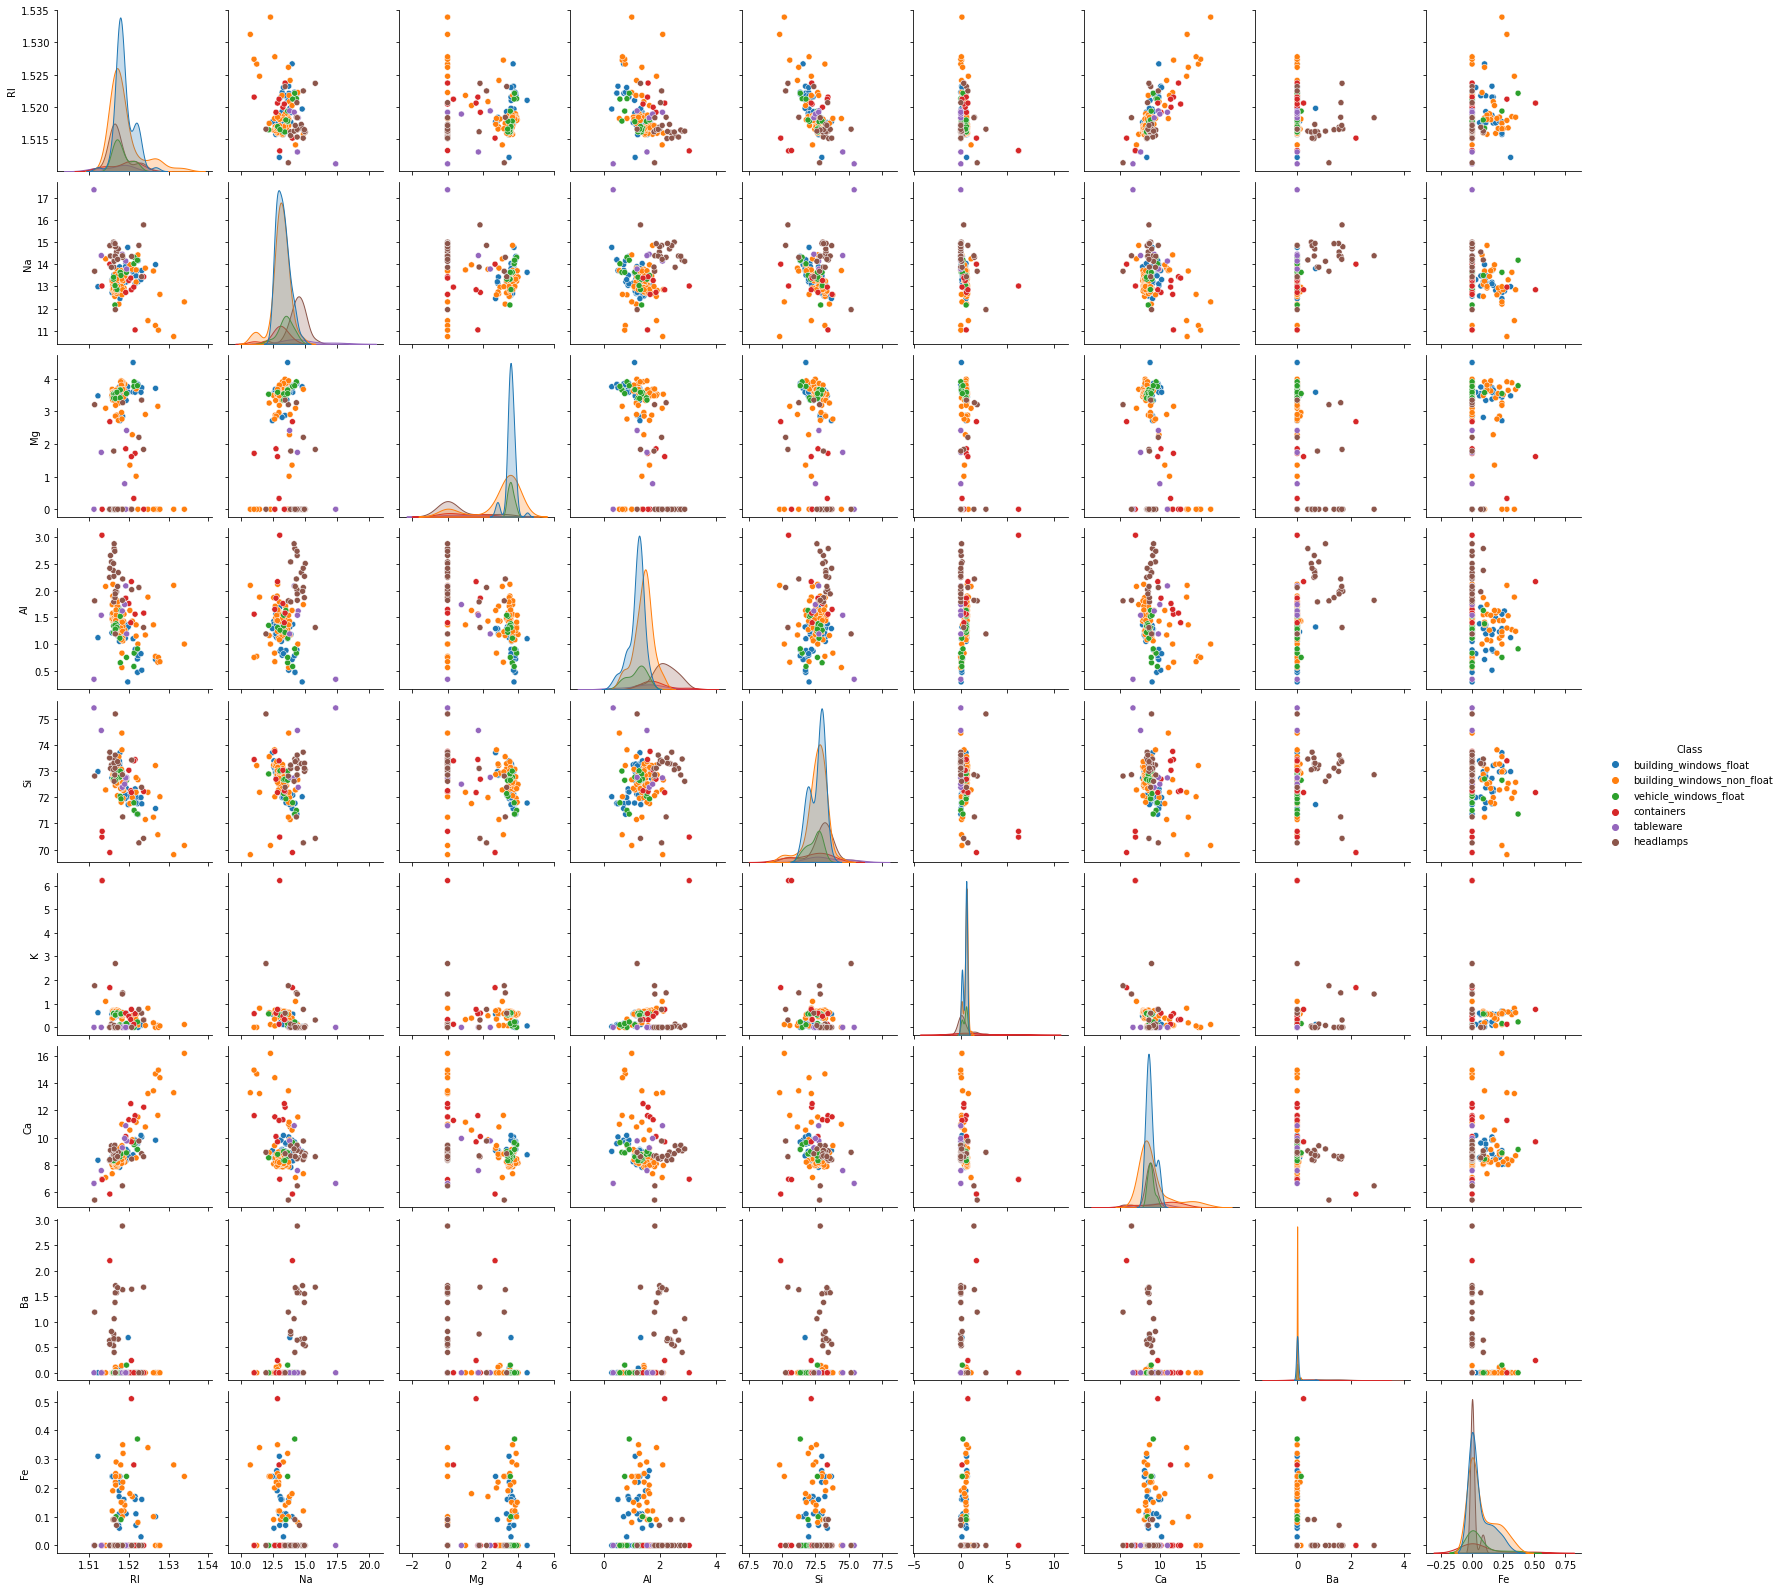

In [46]:
sns.pairplot(data=data, hue='Class')
plt.show

**Задание 4**

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.640000,4.490000,1.10,71.78,0.060000,8.750000,0.000000,0.0,building_windows_float
1,1.51761,13.890000,2.672139,1.36,72.73,0.480000,7.830000,0.000000,0.0,building_windows_float
2,1.51618,13.530000,3.550000,1.54,72.99,0.390000,8.992808,0.000000,0.0,building_windows_float
3,1.51766,13.407436,3.690000,1.29,72.61,0.498442,8.220000,0.000000,0.0,building_windows_float
4,1.51742,13.270000,3.620000,1.24,73.08,0.550000,8.070000,0.169146,0.0,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.140000,0.000000,2.88,72.61,0.080000,9.180000,1.060000,0.0,headlamps
210,1.51685,14.920000,0.000000,1.99,73.06,0.000000,8.400000,1.590000,0.0,NaN
211,1.52065,14.360000,0.000000,2.02,73.42,0.000000,8.440000,1.640000,0.0,headlamps
212,1.51651,14.380000,0.000000,1.94,73.61,0.000000,8.480000,1.570000,0.0,headlamps


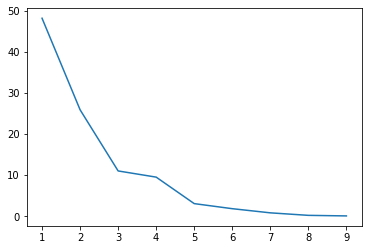

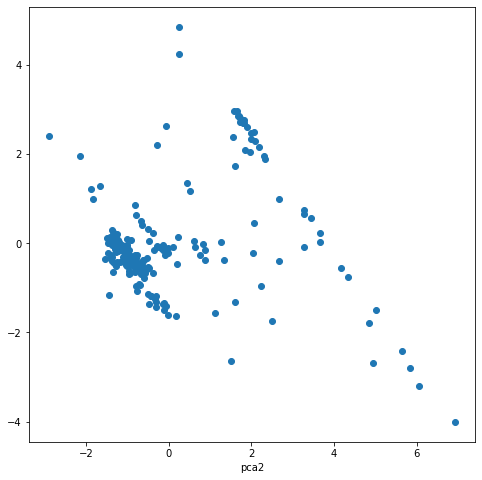

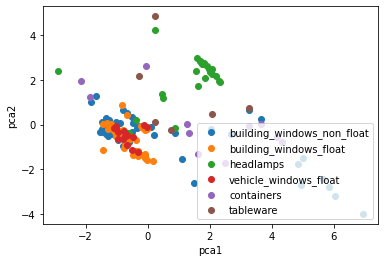

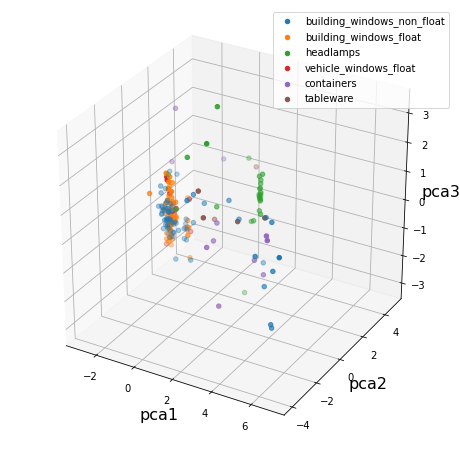

In [47]:
#@markdown Задание 4.1
#@markdown Пропуски
data.mean()
data_fillna_mean=data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)
display(data_fillna_mean)

data_fillna_mean['Na'].isna().sum()


pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])
dataPca= pd.DataFrame(rez)
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()
dataPca['Class']=data_fillna_mean['Class'].copy()
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Class'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Class']==glassType],
             dataPca['pca2'] [dataPca['Class']==glassType],
             dataPca['pca3'] [dataPca['Class']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

In [48]:
corr=data_fillna_mean.corr()

**NaN**

In [49]:
data.mean()

RI     1.518398
Na    13.407436
Mg     2.672139
Al     1.424236
Si    72.642786
K      0.498442
Ca     8.992808
Ba     0.169146
Fe     0.057960
dtype: float64

In [50]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [51]:
data_fillna_mean['Class'].value_counts().index[0]

'building_windows_non_float'

In [52]:
data['Class'].mode()

0    building_windows_non_float
dtype: object

In [53]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [54]:
display(data_fillna_mean)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.640000,4.490000,1.10,71.78,0.060000,8.750000,0.000000,0.0,building_windows_float
1,1.51761,13.890000,2.672139,1.36,72.73,0.480000,7.830000,0.000000,0.0,building_windows_float
2,1.51618,13.530000,3.550000,1.54,72.99,0.390000,8.992808,0.000000,0.0,building_windows_float
3,1.51766,13.407436,3.690000,1.29,72.61,0.498442,8.220000,0.000000,0.0,building_windows_float
4,1.51742,13.270000,3.620000,1.24,73.08,0.550000,8.070000,0.169146,0.0,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.140000,0.000000,2.88,72.61,0.080000,9.180000,1.060000,0.0,headlamps
210,1.51685,14.920000,0.000000,1.99,73.06,0.000000,8.400000,1.590000,0.0,building_windows_non_float
211,1.52065,14.360000,0.000000,2.02,73.42,0.000000,8.440000,1.640000,0.0,headlamps
212,1.51651,14.380000,0.000000,1.94,73.61,0.000000,8.480000,1.570000,0.0,headlamps


In [55]:
#@markdown -----
#@markdown Задание 4/1
#@markdown пропуски и Графики МГК(Заполнить по категориям средними значениями)
data.mean()
data_fillna_mean=data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)
display(data_fillna_mean)

data_fillna_mean['Na'].isna().sum()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.640000,4.490000,1.10,71.78,0.060000,8.750000,0.000000,0.0,building_windows_float
1,1.51761,13.890000,2.672139,1.36,72.73,0.480000,7.830000,0.000000,0.0,building_windows_float
2,1.51618,13.530000,3.550000,1.54,72.99,0.390000,8.992808,0.000000,0.0,building_windows_float
3,1.51766,13.407436,3.690000,1.29,72.61,0.498442,8.220000,0.000000,0.0,building_windows_float
4,1.51742,13.270000,3.620000,1.24,73.08,0.550000,8.070000,0.169146,0.0,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.140000,0.000000,2.88,72.61,0.080000,9.180000,1.060000,0.0,headlamps
210,1.51685,14.920000,0.000000,1.99,73.06,0.000000,8.400000,1.590000,0.0,NaN
211,1.52065,14.360000,0.000000,2.02,73.42,0.000000,8.440000,1.640000,0.0,headlamps
212,1.51651,14.380000,0.000000,1.94,73.61,0.000000,8.480000,1.570000,0.0,headlamps


0

**PCA**

In [56]:
pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [57]:
pca.explained_variance_ratio_*100

array([4.81276027e+01, 2.58396389e+01, 1.09495928e+01, 9.44345064e+00,
       2.99354705e+00, 1.75998313e+00, 7.48739247e-01, 1.37423051e-01,
       2.24985902e-05])

<function matplotlib.pyplot.show>

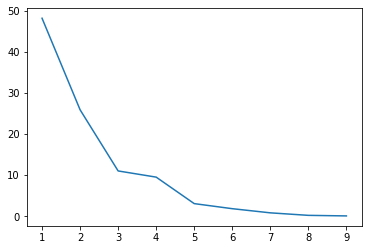

In [58]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show

In [59]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

In [60]:
dataPca= pd.DataFrame(rez)
dataPca.head(3)

,0,1,2,3,4,5,6,7,8
0,-1.437785,-1.159612,0.906496,-0.469199,-0.175602,-0.016502,-0.026707,-0.075939,-0.000882
1,-0.815815,0.853078,0.154471,-0.160551,0.198109,-0.090132,-0.367498,-0.060597,-0.001174
2,-0.622983,-0.384546,-0.162866,-0.398264,0.061058,-0.292876,0.389756,-0.028563,0.001445


In [61]:
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-1.437785,-1.159612,0.906496,-0.469199,-0.175602,-0.016502,-0.026707,-0.075939,-0.000882
1,-0.815815,0.853078,0.154471,-0.160551,0.198109,-0.090132,-0.367498,-0.060597,-0.001174
2,-0.622983,-0.384546,-0.162866,-0.398264,0.061058,-0.292876,0.389756,-0.028563,0.001445
3,-1.274714,-0.186779,0.034384,-0.124621,0.021440,-0.024214,-0.055269,-0.061161,-0.000155
4,-1.330186,0.047265,-0.395026,-0.188028,0.045523,0.156272,0.090830,-0.047411,-0.000666


In [62]:
dataPca['Class']=data_fillna_mean['Class'].copy()

<function matplotlib.pyplot.show>

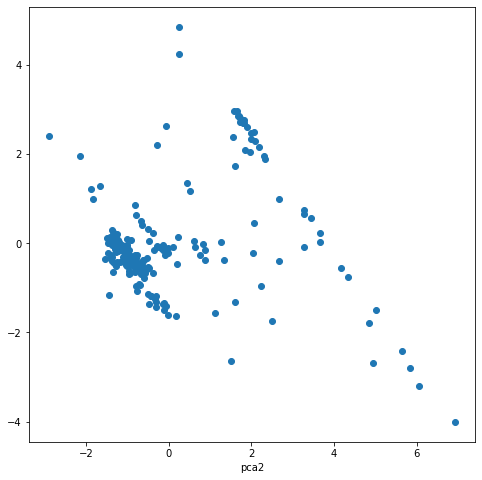

In [63]:
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

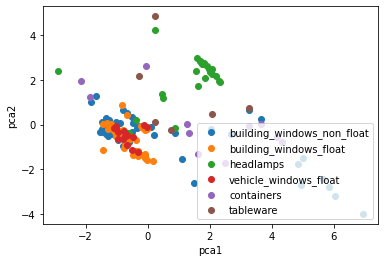

In [64]:
col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

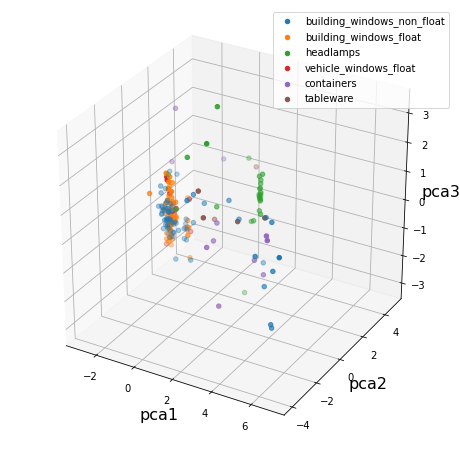

In [65]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Class'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Class']==glassType],
             dataPca['pca2'] [dataPca['Class']==glassType],
             dataPca['pca3'] [dataPca['Class']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

**Заполнить средними и построить графики с новым заполнением**

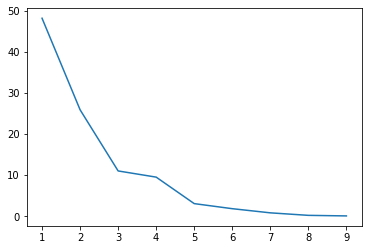

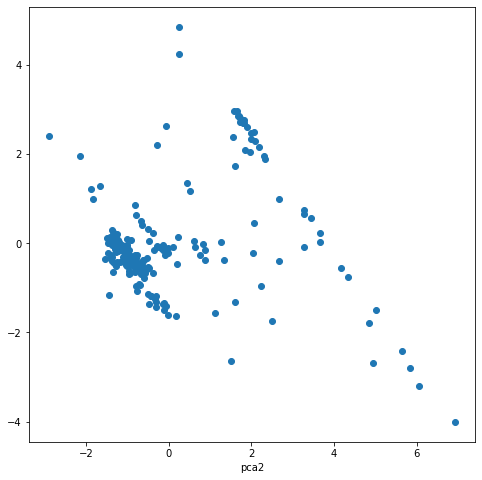

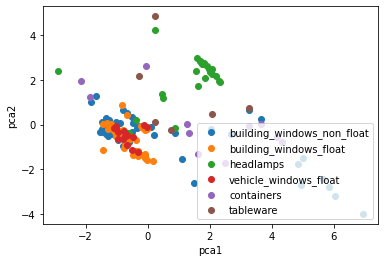

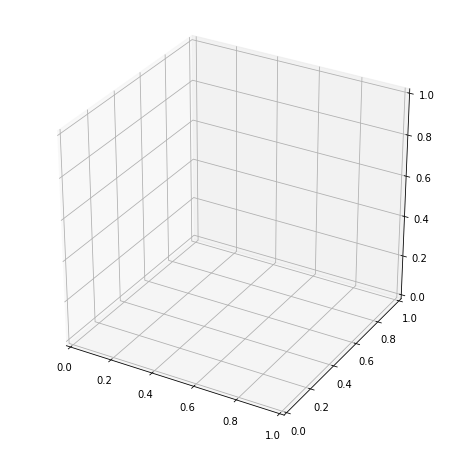

In [66]:
pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])
dataPca= pd.DataFrame(rez)
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()
dataPca['Class']=data_fillna_mean['Class'].copy()
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

**Корреляции**

In [67]:
corr=data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.186639,-0.123103,-0.363049,-0.552062,-0.299250,0.799883,-0.115153,0.172965
Na,-0.186639,1.000000,-0.237087,0.113762,-0.070976,-0.216358,-0.276956,0.442057,-0.214859
Mg,-0.123103,-0.237087,1.000000,-0.430445,-0.185596,0.063813,-0.442912,-0.486250,0.071343
Al,-0.363049,0.113762,-0.430445,1.000000,0.089488,0.195438,-0.185092,0.402877,-0.060419
Si,-0.552062,-0.070976,-0.185596,0.089488,1.000000,-0.184195,-0.232918,-0.016760,-0.133441
K,-0.299250,-0.216358,0.063813,0.195438,-0.184195,1.000000,-0.307502,-0.042924,-0.029330
Ca,0.799883,-0.276956,-0.442912,-0.185092,-0.232918,-0.307502,1.000000,-0.175091,0.127858
Ba,-0.115153,0.442057,-0.486250,0.402877,-0.016760,-0.042924,-0.175091,1.000000,-0.113817
Fe,0.172965,-0.214859,0.071343,-0.060419,-0.133441,-0.029330,0.127858,-0.113817,1.000000


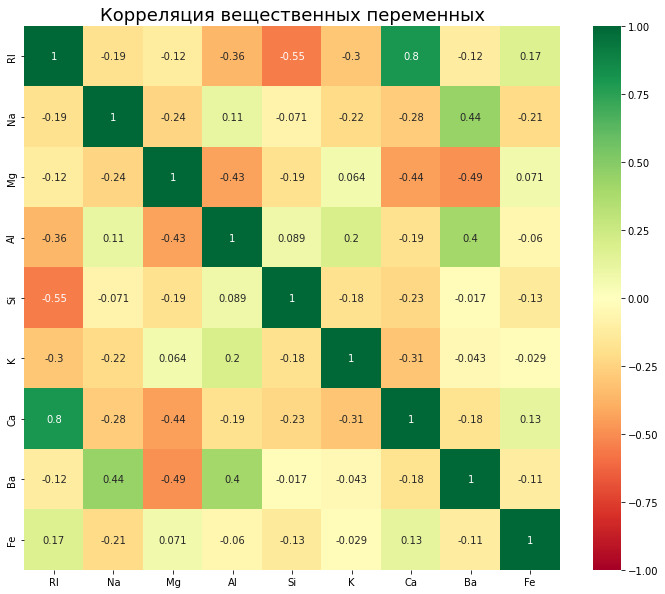

In [68]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

In [69]:
corr[corr>0.54]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,NaN,NaN,NaN,NaN,NaN,0.799883,NaN,NaN
Na,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Ca,0.799883,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


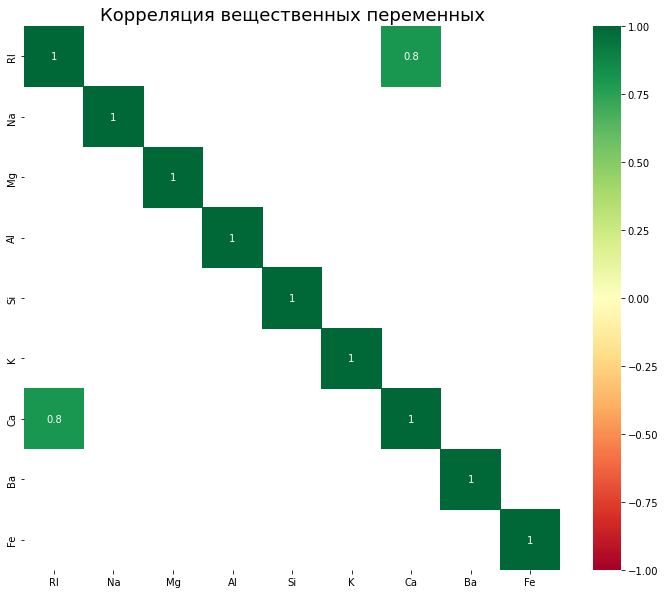

In [70]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[(corr>=0.75)|(corr<=-0.75)],
               annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

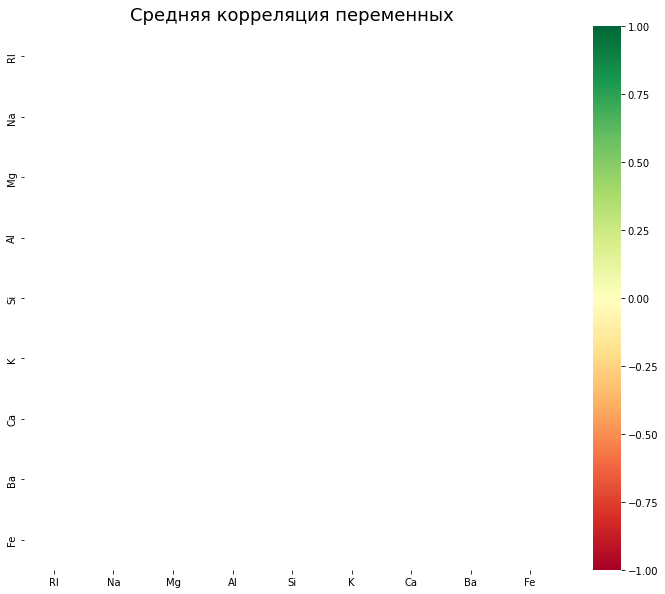

In [71]:
data.mean()
data_fillna_mean = data.fillna(data.mean()).copy()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr[((corr>=-0.45) & (corr<=-0.75)) | ((corr>=0.45) & (corr<=0.75))], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Средняя корреляция переменных', fontsize=18)
plt.show()

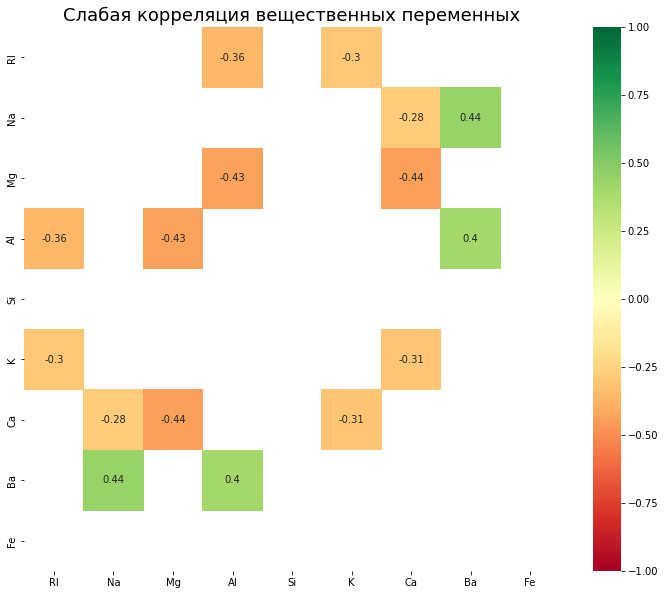

In [72]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[((corr>=-0.45)&(corr<=-0.25)) |((corr>=0.25)&(corr<=0.45))], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Слабая корреляция вещественных переменных',fontsize=18)

plt.show()

**feature importance**

In [73]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].mode()[0], inplace=True)

In [74]:
data_fillna_mean['Class'].mode()[0]

'building_windows_non_float'

In [75]:
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [76]:
forest = ExtraTreesClassifier(n_estimators=100)

In [77]:
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [78]:
data_fillna_mean['Class'].isna().sum()

0

In [79]:
importances= forest.feature_importances_
importances

array([0.13827399, 0.08481278, 0.15427411, 0.15911219, 0.09541049,
       0.10715979, 0.12002536, 0.08492468, 0.05600661])

In [80]:
np.sort(importances)[::-1]

array([0.15911219, 0.15427411, 0.13827399, 0.12002536, 0.10715979,
       0.09541049, 0.08492468, 0.08481278, 0.05600661])

In [81]:
indices=np.argsort(importances)[::-1]
indices

array([3, 2, 0, 6, 5, 4, 7, 1, 8])

In [82]:
print("Featire ranking")
for f in range (9):
  print("%d. feature %s (%f)" % ( f+1, data_fillna_mean.columns.values[indices[f]],
                importances[indices[f]]))

Featire ranking
1. feature Al (0.159112)
2. feature Mg (0.154274)
3. feature RI (0.138274)
4. feature Ca (0.120025)
5. feature K (0.107160)
6. feature Si (0.095410)
7. feature Ba (0.084925)
8. feature Na (0.084813)
9. feature Fe (0.056007)


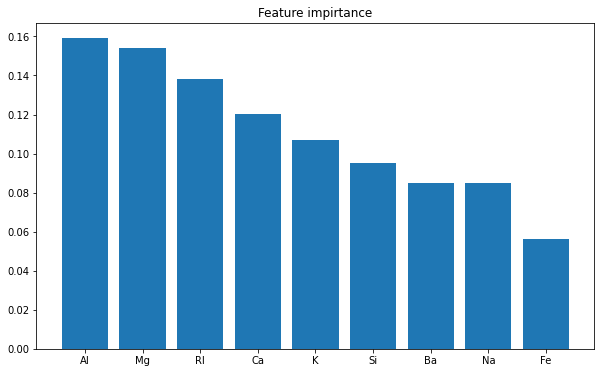

In [83]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature impirtance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices])
plt.show()

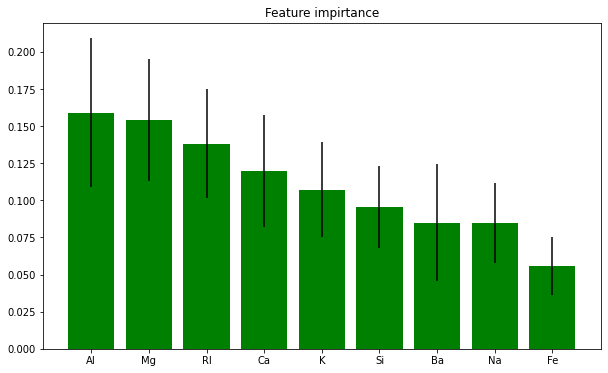

In [84]:
std=np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)


fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature impirtance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices],
       color='g', yerr=std[indices],align="center")
plt.show()